## De module `gdal`

GDAL is een C/C++ bibliotheek voor het converteren van rasterdata en vectordata bestanden. In Python is het mogelijk deze bibliotheek te gebruiken via zogenaamde Python bindings. Deze bindings vertalen de Python commando's in C/C++ commando's zodat het mogelijk wordt GDAL functionaliteit in Python the gebruiken. Om GDAL in Python te kunnen gebruiken moeten zowel de C/C++ bibliotheken als de GDAL Python bindings geïnstalleerd zijn.


In [5]:
# Importeren van module voor toegang tot systeem variabelen en functies
import sys

# Importeren van module voor interactie met file system
import os 

# Importeren van module met mathematische functies
import math

# Importeren van module voor plotten van rasterbestanden
from matplotlib import pyplot

# Importeren van module om te werken met arrays
import numpy

# Test of GDAL/OGR geïnstalleerd is en toon versie
try:
    import gdal
    import gdalnumeric
    import gdalconst
    import ogr
    import osr
    print('GDAL/OGR installed')
    print('Versie is ' + str(gdal.VersionInfo('VERSION_NUM')))
except:
    sys.exit('ERROR: cannot find GDAL/OGR modules')
    
# Print huidige folder
folder = os.getcwd()
print(folder)

# Navigeer naar data folder
os.chdir('/home/nbuser/library/data/raster')

GDAL/OGR installed
Versie is 2020200
/home/nbuser/library/data


## Ophalen eigenschappen van rasterbestanden

In een rasterbestand is data in een regelmatig grid opgeslagen. Een raster is opgebouwd uit rastercellen (pixels). Het aantal rastercellen is bepaald door het aantal rijen en kolommen van het raster. Per rastercel worden één of meer attributen opgeslagen. Attributen worden in een rasterbestand in banden opgeslagen.

Met `gdal` is het mogelijk om deze informatie uit een rasterbestand te halen.

In [6]:
# Open rasterbestand om aantal rijen en kolommen en banden te bepalen
raster_bestand_naam = 'T31UFT_20190824T105031_B02_10m.tif' 
raster_bestand = gdal.Open(raster_bestand_naam)
print('Aantal kolommen ' + str(raster_bestand.RasterXSize))
print('Aantal rijen: ' + str(raster_bestand.RasterYSize))
print('Aantal banden: ' + str(raster_bestand.RasterCount))

# Sluit raster bestand
raster_bestand = None

Aantal kolommen 1378
Aantal rijen: 769
Aantal banden: 1


Voor het berekenen van geografische coördinaten van een rastercel op basis van het rijnummer en kolomnummer in het raster zijn de volgende parameters nodig:
- x-coördinaat linker bovenhoek raster
- y-coördinaat linker bovenhoek raster
- Breedte van een pixel
- Hoogte van een pixel

Voorwaarde is dat het raster niet gedraaid is ten opzichte van het coördinaatsysteem. Als dit wel het geval is, zal ook met de rotatie van het raster rekening gehouden moeten worden bij de omrekening van rijen en kolommen naar x- en y-coördinaten. 

Bovengenoemde eigenschappen van een raster zijn met `gdal` op te vragen. 

In [7]:
# Open rasterbestand
raster_bestand_naam = 'T31UFT_20190824T105031_B04_10m.tif' 
raster_bestand = gdal.Open(raster_bestand_naam)

# Haal geotransform array op om geometrische eigenschappen rasterbestand op te halen
geotransform = raster_bestand.GetGeoTransform()
x_links_boven = geotransform[0]
y_links_boven = geotransform[3]
cel_breedte = geotransform[1]
cel_hoogte = geotransform[5]
print("X-coördinaat linker bovenhoek: " + str(x_links_boven))
print("Y-coördinaat linker bovenhoek: " + str(y_links_boven))
print("Breedte van cel: " + str(cel_breedte))
print("Hoogte van cel: " + str(cel_hoogte))

# Sluit raster bestand
raster_bestand = None

X-coördinaat linker bovenhoek: 644880.4463
Y-coördinaat linker bovenhoek: 5730020.3039
Breedte van cel: 9.997851088534178
Hoogte van cel: -10.004335240572352


Om het raster op de juiste plaats op de aarde te kunnen plaatsen is het noodzakelijk om te weten in welk coördinaatsysteem de x- en y-coördinaat vastgelegd zijn. Dit wordt bepaald door de projectie van het grid.

Ook dit is op te vragen met `gdal`.

In [8]:
# Open rasterbestand om aantal rijen en kolommen en banden te bepalen
raster_bestand_naam = 'T31UFT_20190824T105031_B04_10m.tif' 
raster_bestand = gdal.Open(raster_bestand_naam)

# Opvragen projectie van grid. De projectie wordt afgedrukt in WKT
print(raster_bestand.GetProjection())

# Sluit raster bestand
raster_bestand = None

PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]


Om de rasterwaardes te kunnen benaderen moet het raster in een array geladen worden. Een array is een datastructuur te vergelijken met een Excelbestand waarbij elke cel de waarde van een rastercel bevat. De waarde van een rastercel kan uitgelezen worden op basis van de rij en kolom in de array. Om een raster in een array te laden gebruik je zowel de `gdal` als de `gdalnumeric` module. 

In [9]:
# Open rasterbestand om aantal rijen en kolommen en banden te bepalen
raster_bestand_naam = 'T31UFT_20190824T105031_B04_10m.tif' 
raster_bestand = gdal.Open(raster_bestand_naam)

# Haal de eerste band op uit raster bestand
rasterband = raster_bestand.GetRasterBand(1)

# Laad het grid vanuit de rasterband in het array
array = gdalnumeric.BandReadAsArray(rasterband)
print(array)

# Lees waarde uit op basis van rij en kolom. Let op: array begint bij rij 0 en kolom 0
rij = 137
kolom = 51
waarde = array[(rij-1),(kolom-1)]
print('Waarde in grid op rij ' + str(rij) + ' en kolom ' + str(kolom) + ' is ' + str(waarde))

# Sluit raster bestand
raster_bestand = None

[[ 764  753  732 ...  849 1088 1140]
 [ 728  732  747 ...  626  890 1246]
 [ 722  742  764 ...  326  517  925]
 ...
 [ 363  292  300 ...  267  239  256]
 [ 310  342  310 ...  264  250  250]
 [ 323  344  332 ...  248  233  237]]
Waarde in grid op rij 137 en kolom 51 is 304


In de praktijk haal je geen waardes op uit een raster op basis van rijen en kolommen maar op basis van x-coördinaat en y-coördinaat. Deze coördinaat moet vertaald worden naar een rijnummer en kolomnummer in het raster. Hiervoor zijn de volgende parameters nodig:
- Aantal rijen van raster
- Aantal kolommen van raster
- x-coördinaat linker bovenhoek raster
- y-coördinaat linker bovenhoek raster
- Breedte van een pixel
- Hoogte van een pixel

De berekening kan uitgevoerd worden met de functie `get_value_from_grid`. Deze functie heeft de naam van rasterbestand, nummer van de band en de x- en y-coördinaat waarvoor je de waarde uit het rasterbestand op wilt halen als input. De functie geeft de waarde in het rastserbestand op de ingegeven coördinaat.

**Let op**: Rasterbestand en coördinaten moeten in hetzelfde coördinaatsysteem opgegeven worden. 

In [10]:
# Functie om waarde uit raster te halen op basis van x,y
def get_value_from_grid (raster_bestandnaam_in, band_in, x_in, y_in):

    # Open rasterbestand
    raster_bestand_in = gdal.Open(raster_bestandnaam_in)
    
    # Haal geotransform array op om geometrische eigenschappen rasterbestand op te halen
    nr_kolommen = int(raster_bestand_in.RasterXSize)
    nr_rijen = int(raster_bestand_in.RasterYSize)
    geotransform = raster_bestand_in.GetGeoTransform()
    x_links_boven = float(geotransform[0])
    y_links_boven = float(geotransform[3])
    cel_breedte = float(geotransform[1])
    cel_hoogte = float(geotransform[5])
    
    # Haal de eerste band op uit raster bestand
    rasterband = raster_bestand_in.GetRasterBand(1)

    # Laad het grid vanuit de rasterband in het array
    array = gdalnumeric.BandReadAsArray(rasterband)
    
    # Haal rij en kolom op
    kolom = int(math.ceil((x_in - x_links_boven)/cel_breedte))
    rij = int(math.ceil((y_in - y_links_boven)/cel_hoogte))
        
    # Check of waarde binnen raster valt
    if kolom > 0 and kolom <= nr_kolommen and rij > 0 and rij <= nr_rijen :
        waarde_uit = array[(rij-1),(kolom-1)]
    else :
        print('Opgegeven coördinaat ligt buiten raster')
        waarde_uit = None
      
    # Sluit raster bestand
    array = None
    raster_bestand = None
    
    # Geef waarde terug    
    return waarde_uit 


Je roept bovenstaande functie als volgt aan voor het rasterbestand 'T31UFT_20190824T105031_B04_10m.tif', band 1 en coördinaat 651500, 5726140. Omdat het coördinaatsysteem van het rasterbestand UTM (zone 31N) is, staan de coördinaten ook in dit coördinaatsysteem.

In [11]:
# Haal waarde op voor rastercel in band 1 in rasterbestand
raster_bestand_naam = 'T31UFT_20190824T105031_B04_10m.tif' 
x = 651500
y = 5726140
band = 1
waarde = get_value_from_grid (raster_bestand_naam, band, x, y) 
print('Waarde op coördinaat(' + str(x) + ', ' + str(y) + ') = ' + str(waarde))  

Waarde op coördinaat(651500, 5726140) = 602


## Plotten van rasterbestanden

Voor het plotten van raster bestanden maken we gebruik van het object `pyplot` dat we importeren uit de module '` matplotlib`. Eerst moeten we de data uit het raster bestand in een array laden. Deze array kan vervolgens geplot worden.

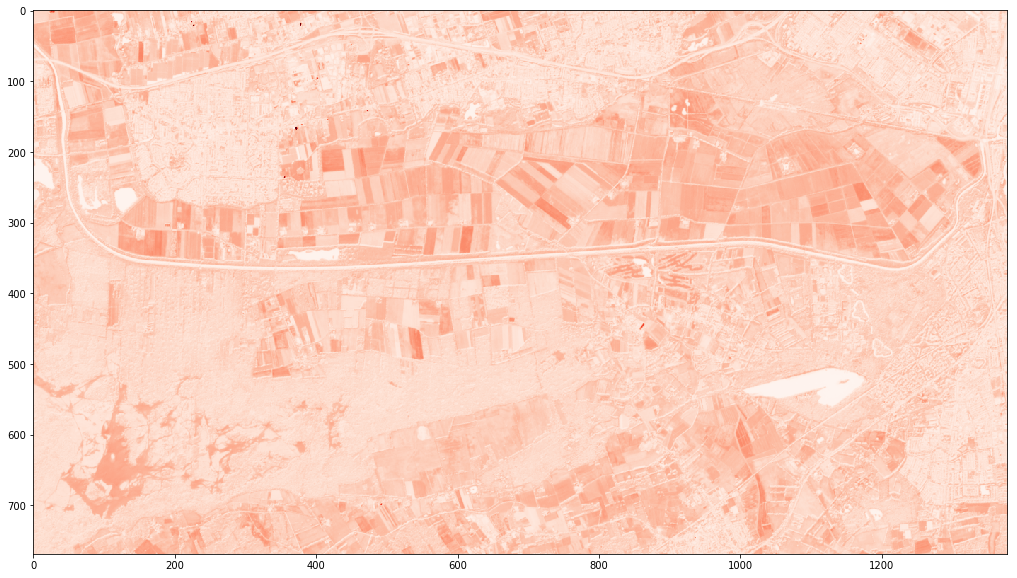

In [12]:
# Open rasterbestand en kopieer data uit band naar array
raster_bestand_naam = 'T31UFT_20190824T105031_B08_10m.tif' 
raster_bestand = gdal.Open(raster_bestand_naam, gdalconst.GA_ReadOnly)
rasterband     = raster_bestand.GetRasterBand(1)
array_band     = gdalnumeric.BandReadAsArray(rasterband)

# Laad array in pyplot en toon plot met colormap pink
pyplot.figure(figsize=(20,10))
pyplot.imshow(array_band, cmap='Reds')
pyplot.show()

Om de verdeling van digital numbers (DN) in het rasterbestand te bekijken, kunnen we een histogram plotten:

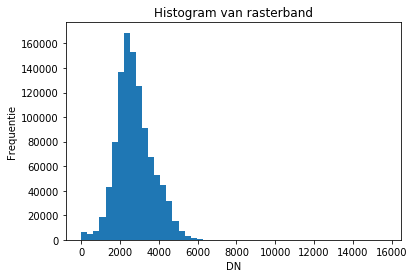

In [13]:
# Show histogram
aantal_klassen = 50
pyplot.hist(numpy.ravel(array_band),aantal_klassen);
pyplot.title('Histogram van rasterband')
pyplot.xlabel('DN'); 
pyplot.ylabel('Frequentie')
pyplot.show()

# Sluit bestand
raster_bestand = None